In [23]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

### Import Square Free Data

In [30]:
newData = pd.read_csv('hdb.csv')
newData.head()

,Unnamed: 0,month,town,flat_type,block,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,0,2015,ANG MO KIO,3 ROOM,174,60.0,Improved,1986,255000.0
1,1,2015,ANG MO KIO,3 ROOM,541,68.0,New Generation,1981,275000.0
2,2,2015,ANG MO KIO,3 ROOM,163,69.0,New Generation,1980,285000.0
3,3,2015,ANG MO KIO,3 ROOM,446,68.0,New Generation,1979,290000.0
4,4,2015,ANG MO KIO,3 ROOM,557,68.0,New Generation,1980,290000.0


In [25]:
print("Data type : ", type(newData))
print("Data dims : ", newData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (826581, 9)


---

##  Predicting Price using Floor ( In general Data )

In [26]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def univariateLinearRegression(Xvar = None, yvar = None, df = None):
    '''
        Function to perform Linear Regression with Xvar and yvar in df.
        Prints the required plots within the function. Returns nothing.
    '''    
    # Extract Response and Predictors
    y = pd.DataFrame(df[yvar])
    X = pd.DataFrame(df[Xvar])

    # Split the Dataset into random Train and Test (80:20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Print the coefficients of the Regression Line
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
    # Formula for the Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train
    
    # Predict Response corresponding to Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_title("Regression Line on Train Set")
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction on Test Set")
    plt.show()

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Prediction Accuracy of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

Intercept 	: b =  [-47581.4534474]
Coefficients 	: a =  [[3570.38459976]]


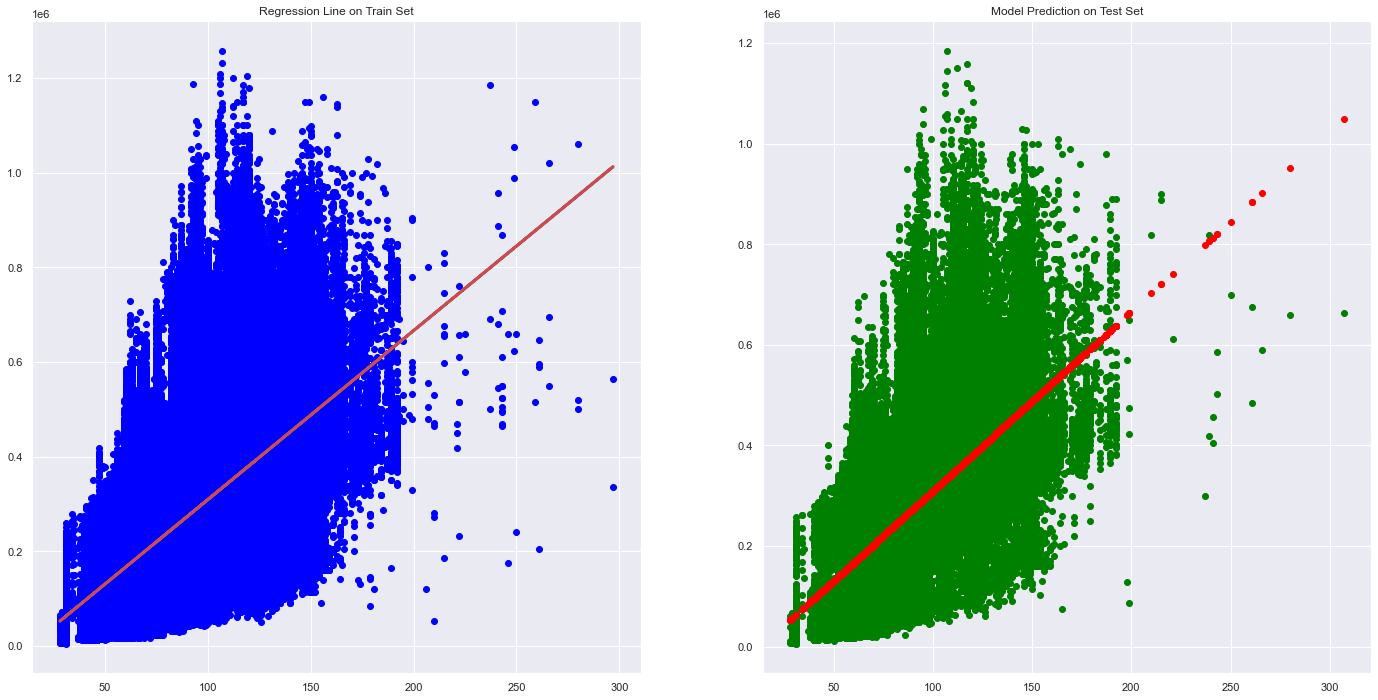

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.39051006880429806
Mean Squared Error (MSE) 	: 13508674745.260122

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.39155288947517564
Mean Squared Error (MSE) 	: 13375046901.887718



In [31]:
univariateLinearRegression(Xvar = "floor_area_sqm", yvar = "resale_price", df = newData)

In [32]:
newData.resale_price.corr(newData.floor_area_sqm)

0.6250746805246351

## Region 

Intercept 	: b =  [-47440.97997663]
Coefficients 	: a =  [[3568.43897662]]


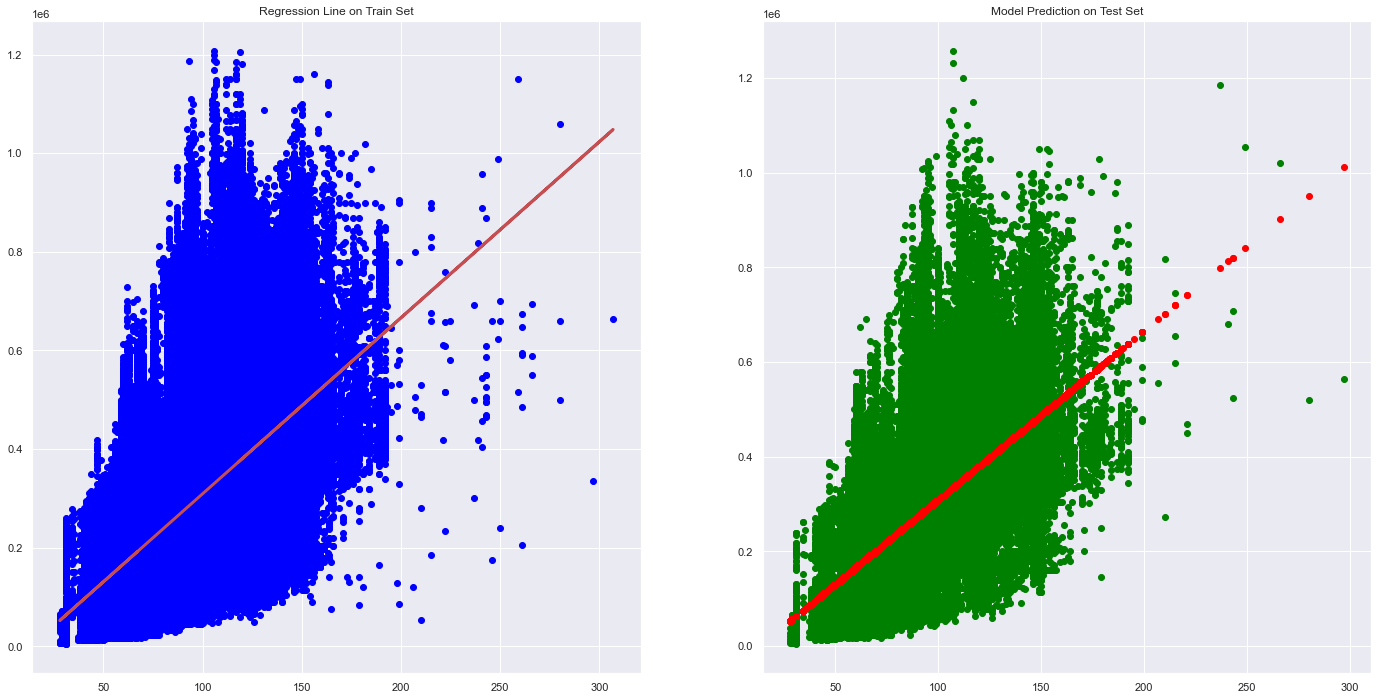

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.39050209843765926
Mean Squared Error (MSE) 	: 13494206071.571556

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.39157693989208564
Mean Squared Error (MSE) 	: 13432896363.347412



In [33]:
univariateLinearRegression(Xvar = "floor_area_sqm", yvar = "resale_price", df = newData)

## The year when they buy the house 

Intercept 	: b =  [-22466871.87097168]
Coefficients 	: a =  [[11356.18003781]]


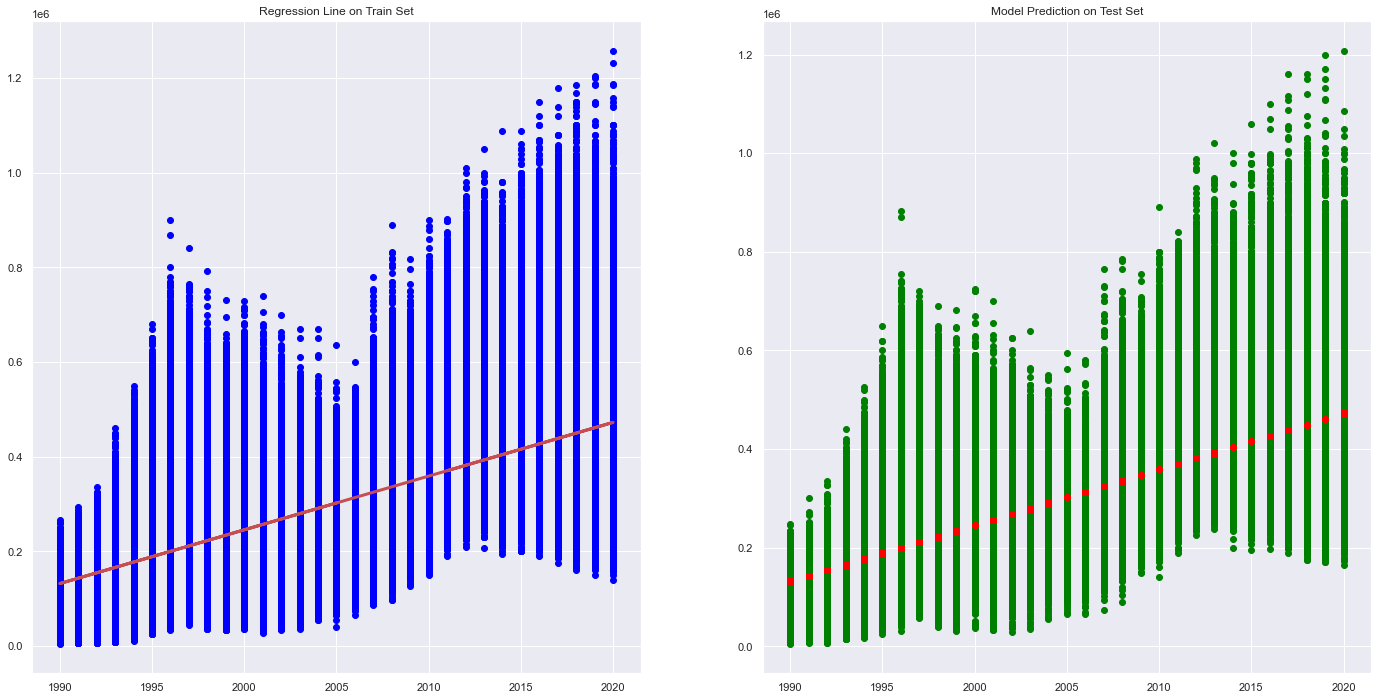

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.36584740974310515
Mean Squared Error (MSE) 	: 14038284185.825733

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.36425354068383764
Mean Squared Error (MSE) 	: 14043456733.210728



In [34]:
univariateLinearRegression(Xvar = "month", yvar = "resale_price", df = newData)

In [35]:
newData.resale_price.corr(newData.month)

0.6045904150035046

## Room Type


### 1 for 1-Room
### 2 for 2-Room
### 3 for 3-Room
### 4 for 4-Room
### 5 for 5-Room
### 6 for Executive
### 7 for Multi Generation

Intercept 	: b =  [-108904.13068647]
Coefficients 	: a =  [[100579.72203739]]


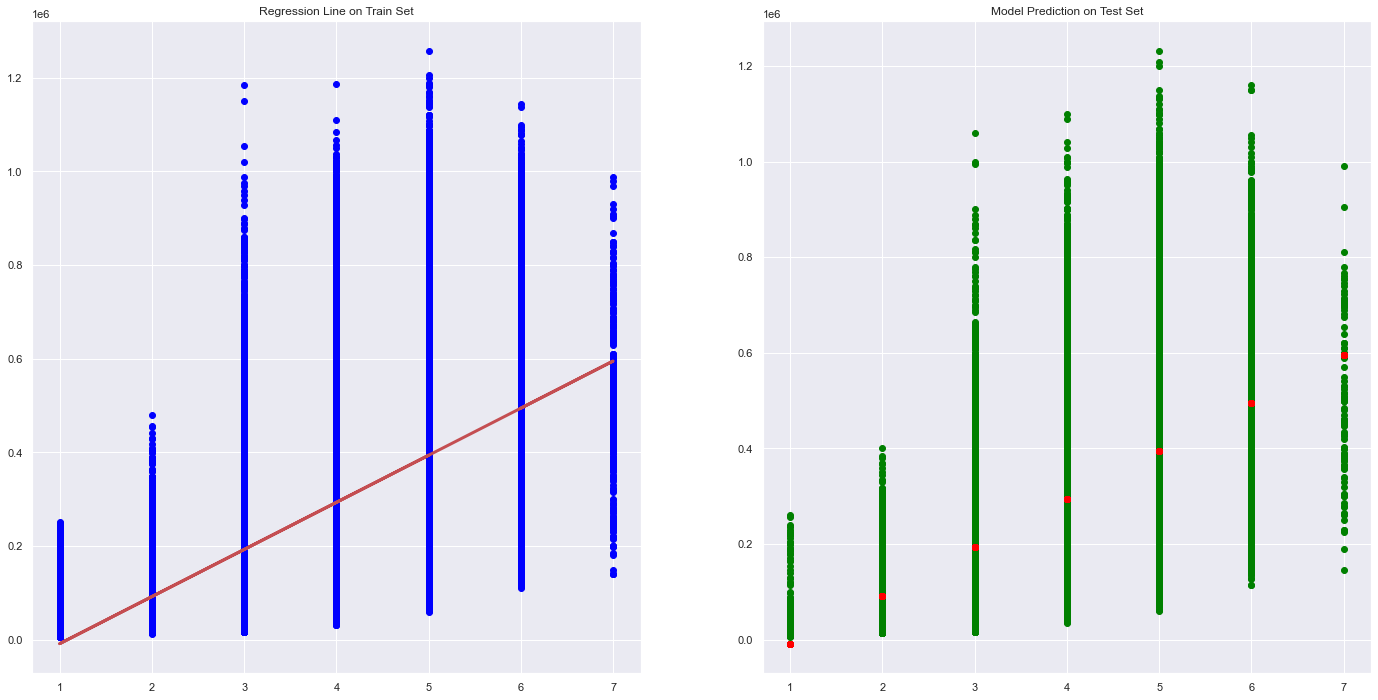

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.41446172594096997
Mean Squared Error (MSE) 	: 12958805676.0865

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4096544505948235
Mean Squared Error (MSE) 	: 13053826461.836222



In [45]:
new1Data = pd.read_csv('hdb2.csv')
univariateLinearRegression(Xvar = "flat_type", yvar = "resale_price", df = new1Data)

In [44]:
new1Data.resale_price.corr(new1Data.flat_type)

0.6430410110260887